<a href="https://colab.research.google.com/github/shivankb/Yes-Bank-Stock-Closing-Price-Prediction/blob/master/yes_bank_stock_closing_price_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yes Bank Stock Closing Price Prediction

#Project Summary

**Yes Bank** is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

#Dataset description
1. Date - Date of record
2. Open - Opening Price
3. High - Highest price in the day
4. Low - Lowest price in the day
5. Close - Price at the end of the day

#Problem Statement

#*Let's Begin !*

##Importing data and mounding drive

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
from datetime import datetime
from datetime import date
from numpy import math
from numpy import loadtxt

import math
from scipy.stats import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import export_graphviz

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.1/571.1 KB 8.9 MB/s eta 0:00:00


In [3]:
#Mounting CSV files from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Creating data files path and reading the csv files
yesbank_df = pd.read_csv(r"/content/drive/MyDrive/Yes Bank ML-Regression/data_YesBank_StockPrices.csv")

##Dataset first view

In [5]:
yesbank_df.head(3)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30


In [6]:
yesbank_df.tail(3)

,Date,Open,High,Low,Close
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [7]:
yesbank_df.shape

(185, 5)

In [8]:
yesbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [9]:
yesbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
yesbank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [11]:
yesbank_df.describe(include="all")

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [12]:
yesbank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

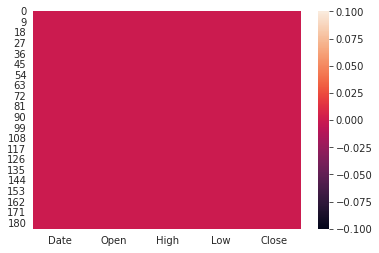

In [13]:
# Checking Null Value by plotting Heatmap
sns.heatmap(yesbank_df.isnull())

In [14]:
yesbank_df.duplicated().sum()

0

In [15]:
# Checking Unique Values for each variable.
for i in yesbank_df.columns.tolist():
  print(i,"have",yesbank_df[i].nunique(),"unique values"".")

Date have 185 unique values.
Open have 183 unique values.
High have 184 unique values.
Low have 183 unique values.
Close have 185 unique values.


##Date Wrangling

In [16]:
#Creating date format and new month column

yesbank_df['date_new']=yesbank_df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))
yesbank_df["month"]=yesbank_df["date_new"].apply(lambda x : datetime.strftime(x, '%B'))
yesbank_df["year"]=yesbank_df["date_new"].apply(lambda x : datetime.strftime(x, '%Y'))

In [17]:
yesbank_df.sample(1)

,Date,Open,High,Low,Close,date_new,month,year
75,Oct-11,53.8,64.8,48.1,62.9,2011-10-01,October,2011


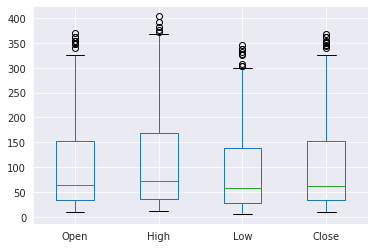

In [18]:
yesbank_df.boxplot()

In [19]:
df= yesbank_df.copy()

In [20]:
# Stock Opening mean price as on month
month_vs_open=df.groupby(['month'])["Open"].mean().reset_index()
month_vs_open

,month,Open
0,April,113.044000
1,August,108.481875
2,December,100.850000
3,February,109.134667
4,January,100.928000
5,July,103.891250
6,June,113.268000
7,March,108.150667
8,May,114.589333
9,November,97.975000


In [21]:
#  Stocks Higher mean price as on month
month_vs_high=df.groupby(['month'])["High"].mean().reset_index()
month_vs_high

,month,High
0,April,125.709333
1,August,116.064375
2,December,107.654000
3,February,116.035333
4,January,117.346667
5,July,117.493750
6,June,118.471333
7,March,123.670667
8,May,122.090000
9,November,105.645000


In [22]:
# Stocks Lower mean price as on month 
month_vs_low=df.groupby(['month'])["Low"].mean().reset_index()
month_vs_low

,month,Low
0,April,102.284667
1,August,95.777500
2,December,92.808000
3,February,98.238667
4,January,93.766000
5,July,96.206250
6,June,102.642000
7,March,98.524000
8,May,102.404667
9,November,87.251875


In [23]:
# Stocks closing mean price as on month
month_vs_close=df.groupby(['month'])["Close"].mean().reset_index()
month_vs_close

,month,Close
0,April,114.450000
1,August,103.386875
2,December,100.724000
3,February,107.760667
4,January,108.774667
5,July,108.322500
6,June,109.661333
7,March,113.014000
8,May,112.874667
9,November,94.671250


In [24]:
# stocks opening, closing, higher, lower median price as on month
df_mean=df.groupby(['month' ]).median()
df_mean

,Open,High,Low,Close
month,,,,
April,73.620,76.100,69.110,70.070
August,64.450,68.345,51.830,57.555
December,70.000,70.500,55.440,62.540
February,61.540,62.700,58.420,60.950
January,62.980,66.500,49.390,61.590
July,65.575,70.595,59.535,63.445
June,65.450,70.600,62.140,67.830
March,60.520,83.360,60.340,73.460
May,70.400,70.590,58.850,66.020


In [25]:
# Stocks open, close, high, low prices on 2005
df1=df[["Open","Close","High","Low","year"]]
year_wise=df1[df1.year=='2005']
year_wise


,Open,Close,High,Low,year
0,13.00,12.46,14.00,11.25,2005
1,12.58,13.42,14.88,12.55,2005
2,13.48,13.30,14.87,12.27,2005
3,13.20,12.99,14.47,12.40,2005
4,13.35,13.41,13.88,12.88,2005
5,13.49,13.71,14.44,13.00,2005


#Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

[Text(0.5, 1.0, 'Monthly share open mean price ')]

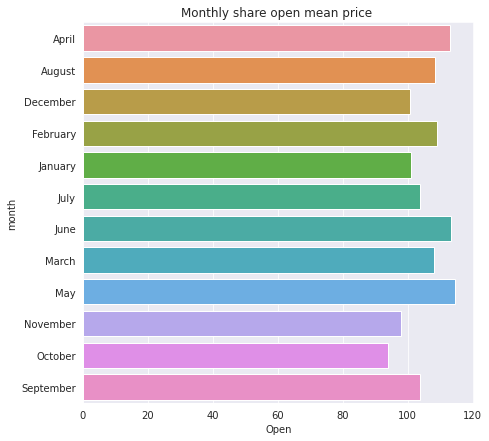

In [26]:
# Chart - 1 Month vs share open price
fig,ax=plt.subplots(figsize=(7,7))
sns.barplot(data=month_vs_open,x='Open',y='month',ax=ax,capsize=.2)
ax.set(title='Monthly share open mean price ')

##### 1. Why did you pick the specific chart?

A bar chart is a way of summarizing a set of categorical data (continuous data can be made categorical by auto-binning). The bar chart displays data using a number of bars, each representing a particular category. The height of each bar is proportional to a specific aggregation (for example the sum of the values in the category it represents). The categories could be something like an age group or a geographical location. It is also possible to color or split each bar into another categorical column in the data, which enables you to see the contribution from different categories to each bar or group of bars in the bar chart.

##### 2. What is/are the insight(s) found from the chart?

As we looked at the plot, we learned that


*   Yes bank **Closing** price is minimum on Oct month i.e. 93.81
*   Yes bank **Closing** price is maximum on May month i.e. 114.31



##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

As we see in above chart in the Oct, Nov, and Dec month closing price is lower, Yes Bank bad news headlines may have come.

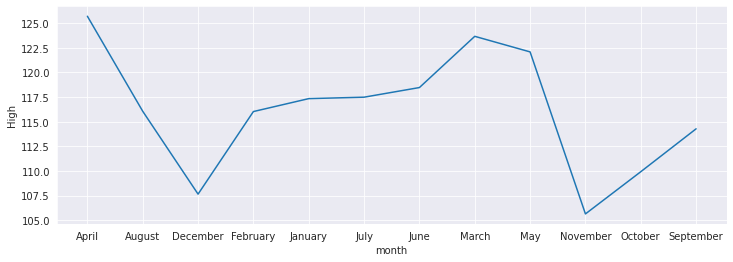

In [27]:
# Chart - 2 Month vs share high price

monthvshigh=df.groupby(['month'])['High'].mean().reset_index()
plt.figure(figsize=(12,4))
x= sns.lineplot(x = 'month',y = 'High', data = monthvshigh)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is a type of chart that provides a visual representation of data in the form of points that are connected in a straight line. A line chart is one of the simplest methods to understand any financial data and trading data. Let us discuss more a line chart, the types, advantages and disadvantages, and solve a few examples as well.


##### 2. What is/are the insight(s) found from the chart?

As we looked at the plot, we learned that


*   Yes bank **Higher** price is minimum on nov month i.e. 105
*   Yes bank **Higher** price is maximum on apr month i.e. 125

Stocks price get suddenly fall in Nov month.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we see in above chart in the Nov and Dec month closing price is lower, Yes Bank bad news headlines may have hit the market
.

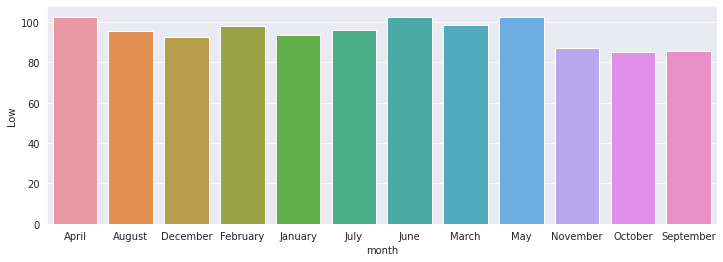

In [28]:
# Chart - 3 Month vs share Low price

monthvslow=df.groupby(['month'])['Low'].mean().reset_index()
plt.figure(figsize=(12,4))
x= sns.barplot(x = 'month',y = 'Low', data = monthvslow)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a way of summarizing a set of categorical data (continuous data can be made categorical by auto-binning). The bar chart displays data using a number of bars, each representing a particular category. The height of each bar is proportional to a specific aggregation (for example the sum of the values in the category it represents). The categories could be something like an age group or a geographical location. It is also possible to color or split each bar into another categorical column in the data, which enables you to see the contribution from different categories to each bar or group of bars in the bar chart.

##### 2. What is/are the insight(s) found from the chart?

As we looked at the plot, we learned that


*   Yes bank **Lower** price is minimum on oct month i.e. 85.36
*   Yes bank **Lower** price is maximum on Jun month i.e. 102.64



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we see in above chart in the oct,nov and dec month stocks Low price is lower, Yes Bank bad news headlines may have come.

([<matplotlib.patches.Wedge at 0x7efe8f37f520>,
 [Text(1.0558218010570295, 0.3086103115786816, 'April'),
  Text(0.7459051359577611, 0.8084711053289624, 'August'),
  Text(0.2593539280672331, 1.0689880916063081, 'December'),
  Text(-0.30399254164845796, 1.057160600203257, 'February'),
  Text(-0.8027753503240831, 0.752031739298313, 'January'),
  Text(-1.0750585788903373, 0.2329142588041544, 'July'),
  Text(-1.041263170971285, -0.3546420854591639, 'June'),
  Text(-0.6995566830828756, -0.8488936606867113, 'March'),
  Text(-0.14040564259078772, -1.091002408580599, 'May'),
  Text(0.41586145867973007, -1.018361059342298, 'November'),
  Text(0.8371550411966413, -0.7135624969118334, 'October'),
  Text(1.0705471437832697, -0.2528414778818611, 'September')],
 [Text(0.5759028005765614, 0.1683328972247354, '9.1%'),
  Text(0.40685734688605146, 0.4409842392703431, '8.2%'),
  Text(0.1414657789457635, 0.5830844136034408, '8.0%'),
  Text(-0.16581411362643161, 0.576633054656322, '8.5%'),
  Text(-0.4378774

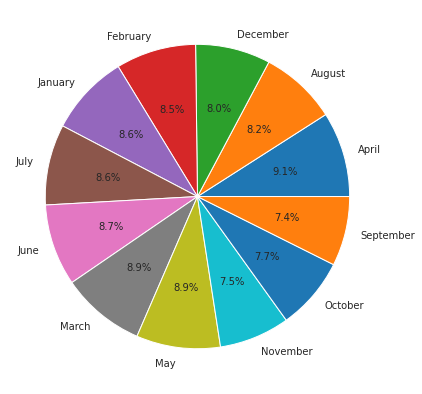

In [29]:
# Chart - 4 Close mean share with pie
plt.figure(figsize=(7,7))
plt.pie(list(month_vs_close['Close']),labels=list(month_vs_close['month'].value_counts().keys()),autopct='%0.1f%%')

##### 1. Why did you pick the specific chart?

A pie chart is a type of graph that represents the data in the circular graph. The slices of pie show the relative size of the data, and it is a type of pictorial representation of data. A pie chart requires a list of categorical variables and numerical variables. Here, the term “pie” represents the whole, and the “slices” represent the parts of the whole.

##### 2. What is/are the insight(s) found from the chart?

Yes bank closing price is minimum in the month Nov, Oct and sept as compared to other months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As we see above pie chart every month stock price are almost equally distributed.

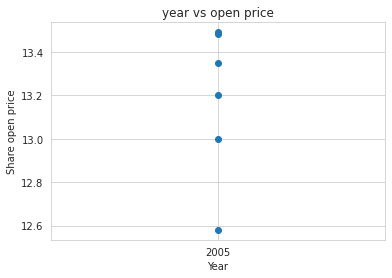

In [52]:
# Chart - 5 Share open price as on 2005
months=year_wise['year']
opens=year_wise['Open']
plt.scatter(months,opens) #creating bar plot

plt.xlabel("Year")
plt.ylabel("Share open price")
plt.title("year vs open price")
plt.show()

##### 1. Why did you pick the specific chart?

The scatter diagram graphs pairs of numerical data, with one variable on each axis, to look for a relationship between them. If the variables are correlated, the points will fall along a line or curve. The better the correlation, the tighter the points will hug the line. This cause analysis tool is considered one of the seven basic quality tools.

##### 2. What is/are the insight(s) found from the chart?

In 2005 yes bank share price ranging from 12.6 to ~14

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

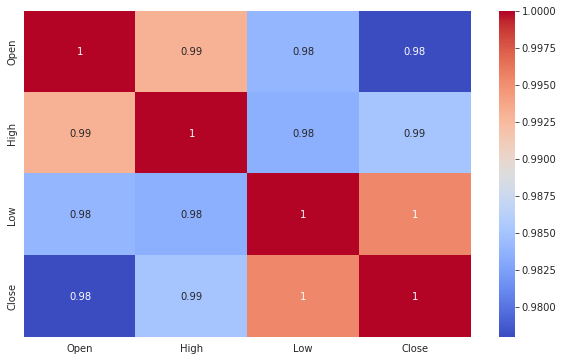

In [30]:

# Chart - 6 Correlation Heatmap visualization code

plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A Correlation Graph is a measurement between two sets of data or variables. It is mostly used in economics, statistics, and social science. It is used to measure relations or to see the differences between variables in a graph.



##### 2. What is/are the insight(s) found from the chart?

As we see in above chart closing price and lower price is highliy co related to each other.

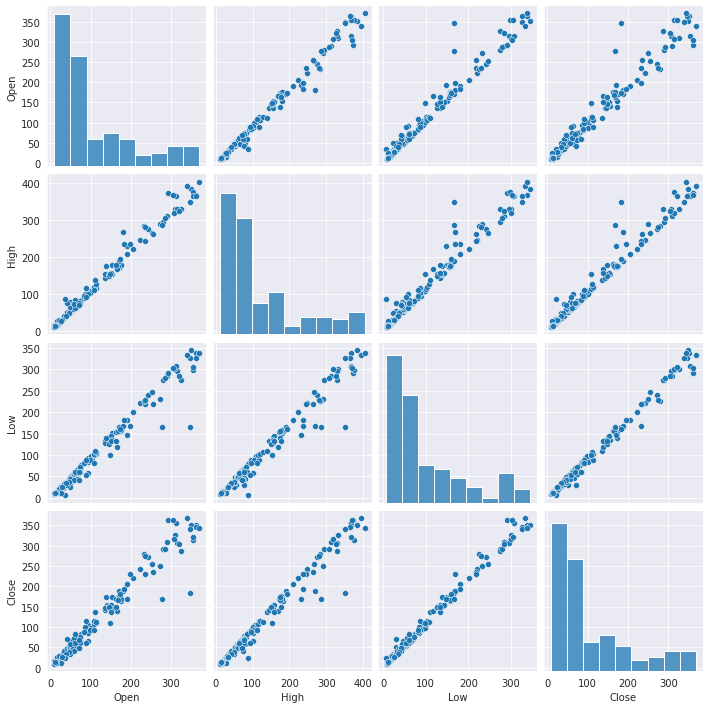

In [31]:
# Chart - 7 Pair Plot visualization code
sns.pairplot( df)

##### 1. Why did you pick the specific chart?

A pair plot is a data visualization that plots pair-wise relationships between all the variables of a dataset. This allows you to better understand the relationships visually, while even layering in additional details (such as by using color). Each variable is plotted both in the rows and columns, showing the relationships between the variables.

##### 2. What is/are the insight(s) found from the chart?

Above chart shows the co-linearity of data set column individuly with graphical manner.

#Hypothesis Testing


In [32]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

##Hypothetical Statement - 1
Stocks Lower mean price as per months i.e. 105

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 105

Alternate Hypothesis : N < 105

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [33]:
# Getting the required parameter values for hypothesis testing
hypothesis_number = 105
sample_mean = df["Low"].mean()
size = len(df)
std=(variance(df["Low"]))**0.5

In [34]:
# Performing Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=df,col="Low")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.06695632294655507.


### Which statistical test have you done to obtain P-Value?

The z-test is a statistical test to determine if two population means differ when the variance and large sample size are known. The z test is a hypothesis test in which the z statistic follows a normal distribution. The z-statistic, or z-score, is a number representing the outcome of a z-test.

###Why did you choose the specific statistical test?

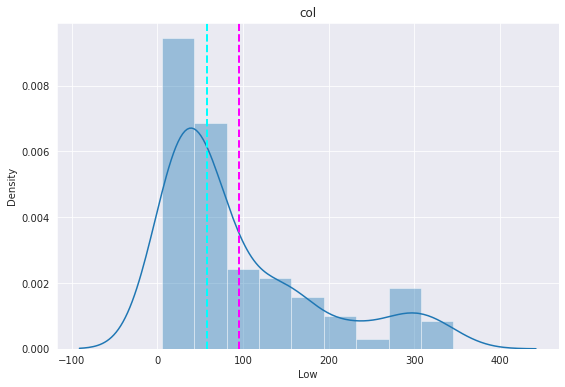

In [35]:
# Visialization 
fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (df["Low"])
sns.distplot(df["Low"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used **Z-Test** directly.

### Hypothetical Statement - 2
Stocks Higher mean price as per months i.e. 116

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 116

Alternate Hypothesise : mean != 116

Type of Test : Two Sampled test

In [37]:
# Perform Statistical Test to obtain P-Value


# Calculating the mean of the sample  
mean=df['High'].mean()
print(mean)
  
# Performing the T-Test   
t_test, p_val = ttest_1samp(df['High'], 116)  
print("P-value is: ", p_val)  
  
# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:      
    print(" We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis")  

116.10432432432432
P-value is:  0.9893674268402393
We can accept the null hypothesis


##### Which statistical test have you done to obtain P-Value?

##### Why did you choose the specific statistical test?

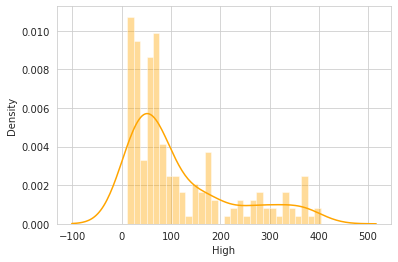

In [39]:
# Visualization

sns.set_style('whitegrid')
feature= (df["High"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
sns.distplot(df['High'], kde = True, color ='orange', bins = 30)

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used T-Test directly.

###Hypothetical Statement - 3
Stocks Closing mean price as per months i.e. 105

####1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis : mean = 105

Alternate Hypothesise : mean != 105

Type of Test : Two Sampled test

####2. Statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

# Calculating the mean of the sample  
mean=df['Open'].mean()
print(mean)
  
# Performing the T-Test   
t_test, p_val = ttest_1samp(df['Open'], 105)  
print("P-value is: ", p_val)  
  
# taking the threshold value as 0.05 or 5%  
if p_val < 0.05:      
    print(" We can reject the null hypothesis")  
else:  
    print("We can accept the null hypothesis")  

105.5414054054054
P-value is:  0.9407146805767181
We can accept the null hypothesis


##### Which statistical test have you done to obtain P-Value?

A t-test is a type of inferential statistic used to determine a significant difference between the mean values ​​of two groups, possibly related to certain characteristics. The t-test is used as a hypothesis testing tool, testing a hypothesis that applies to a population. The t-test examines t-statistics, t-distribution, and degrees of freedom to determine statistical significance. The t-test allows us to compare the mean of two data sets and determine if they come from the same population.

##### Why did you choose the specific statistical test?

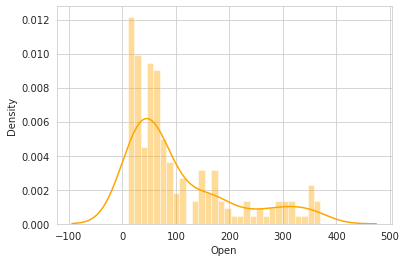

In [41]:
# Visualization

sns.set_style('whitegrid')
feature= (df["Open"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
sns.distplot(df['Open'], kde = True, color ='orange', bins = 30)

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used T-Test directly.

#Feature Engineering & Data Pre-processing

###1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation
print(df.isnull().sum())

Date        0
Open        0
High        0
Low         0
Close       0
date_new    0
month       0
year        0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

*  As we execute above code to detect a count of null value, we get outout as 0.
*  i.e No null value present in given dataset.

### 2. Handling Outliers

In [43]:
numerical_columns=list(df.describe())
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

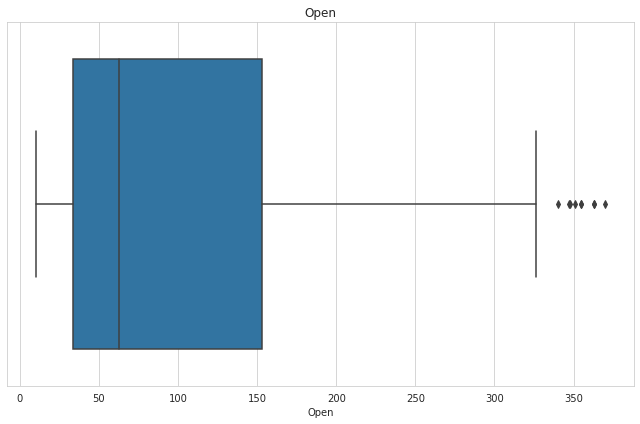

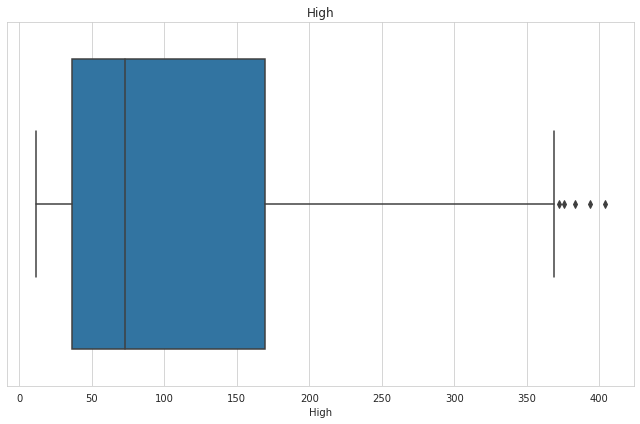

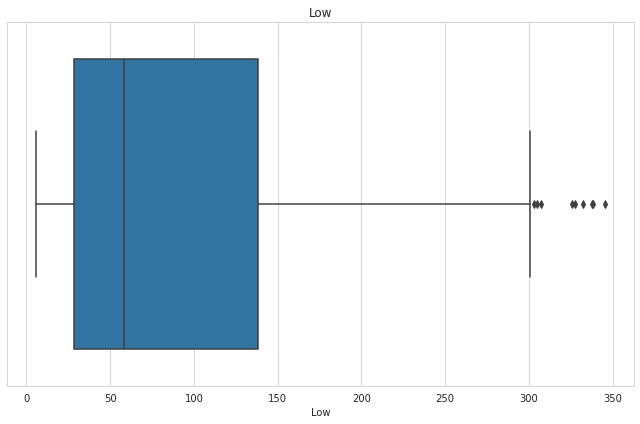

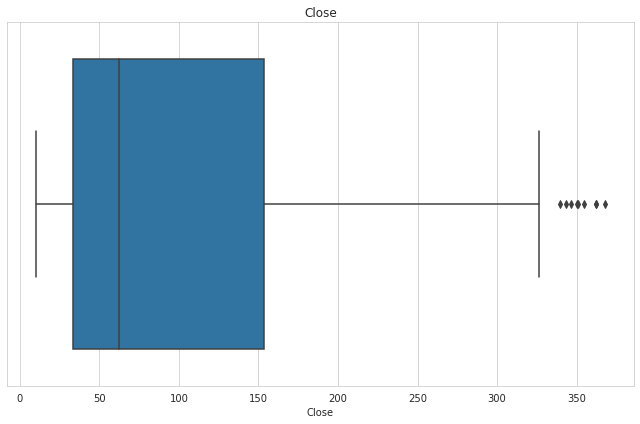

In [44]:
# Handling Outliers & Outlier treatments

for col in numerical_features:
  plt.figure(figsize=(9,6))
  sns.boxplot(x=df[col])
  
  plt.title(col)
  plt.tight_layout()
  

plt.show()

As we execute above code we found that, given data set contain Close, Low, Open and High columns. which have neigligible outliers so, no action needed.

###3. Categorical Encoding

In [46]:
# Encode your categorical columns
categorical_columns=list(set(df.columns.to_list()).difference(set(df.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['year', 'Date', 'month', 'date_new']


In [47]:
# Getting dictionaries for Label Encoding

year_list=sorted(list(df["year"].unique()))
dict3=dict(zip(year_list,range(len(year_list))))
dict3

{'2005': 0,
 '2006': 1,
 '2007': 2,
 '2008': 3,
 '2009': 4,
 '2010': 5,
 '2011': 6,
 '2012': 7,
 '2013': 8,
 '2014': 9,
 '2015': 10,
 '2016': 11,
 '2017': 12,
 '2018': 13,
 '2019': 14,
 '2020': 15}

###4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
from scipy.stats import pearsonr
# Manipulate Features to minimize feature correlation and create new features
list1 = df['High']
list2 = df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)
 

Pearsons correlation: 0.985


In [49]:
list1 = df['Low']
list2 = df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.995


In [50]:
list1 = df['Open']
list2 = df['Close']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.978


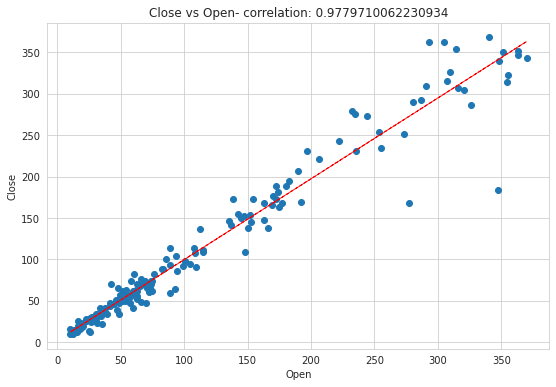

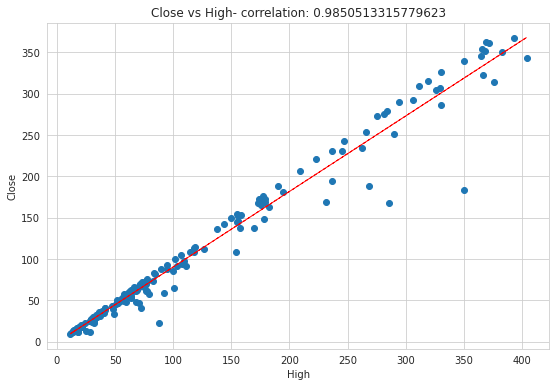

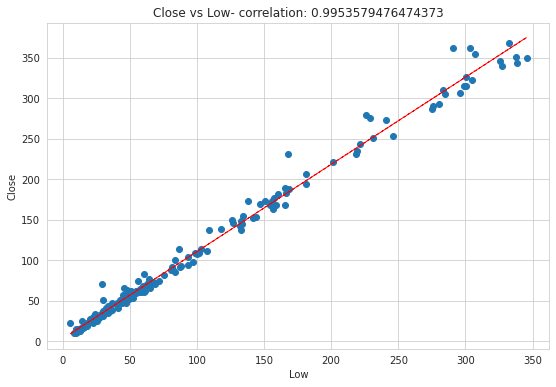

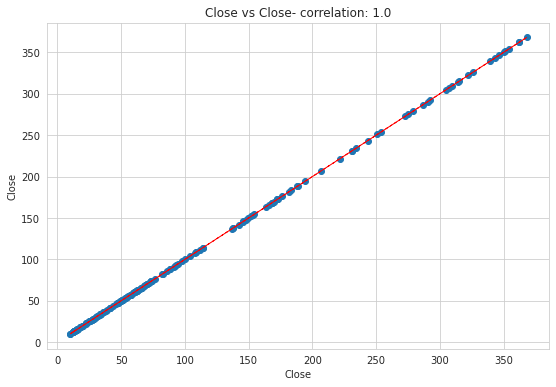

In [51]:
# scatter plot  on given data set

for col in numerical_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Close'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()